<a href="https://colab.research.google.com/github/rohanvitrouthu/sectoralstockanalysis/blob/main/Power_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
dataset_path = '/content/drive/MyDrive/DATA 606 Capstone/Dataset/Merged Data'

In [7]:
# Load the data for a specific sector from its CSV file
sector_data = pd.read_csv(f"{dataset_path}/Power.csv")

In [8]:
# Display basic information about the dataset
print(sector_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7447 entries, 0 to 7446
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                7447 non-null   object 
 1   Symbol              7447 non-null   object 
 2   Series              7447 non-null   object 
 3   Prev Close          7447 non-null   float64
 4   Open                7447 non-null   float64
 5   High                7447 non-null   float64
 6   Low                 7447 non-null   float64
 7   Last                7447 non-null   float64
 8   Close               7447 non-null   float64
 9   VWAP                7447 non-null   float64
 10  Volume              7447 non-null   int64  
 11  Turnover            7447 non-null   float64
 12  Trades              4912 non-null   float64
 13  Deliverable Volume  7447 non-null   int64  
 14  %Deliverble         7447 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 872.8

In [9]:
# Summary statistics of the dataset
print(sector_data.describe())

        Prev Close         Open         High          Low         Last  \
count  7447.000000  7447.000000  7447.000000  7447.000000  7447.000000   
mean    146.629838   146.820545   148.787471   144.644790   146.648852   
std      39.030107    39.082776    39.531747    38.600477    38.995528   
min      52.000000    61.700000    62.000000    52.000000    59.150000   
25%     110.525000   110.700000   112.350000   109.050000   110.550000   
50%     144.200000   144.450000   146.400000   142.300000   144.300000   
75%     177.325000   177.550000   179.600000   175.100000   177.375000   
max     284.650000   289.000000   290.750000   271.150000   286.850000   

             Close         VWAP        Volume      Turnover         Trades  \
count  7447.000000  7447.000000  7.447000e+03  7.447000e+03    4912.000000   
mean    146.657835   146.726695  6.681933e+06  9.452641e+13   40762.377443   
std      39.014997    39.043961  1.132748e+07  1.360231e+14   30178.089039   
min      58.000000   

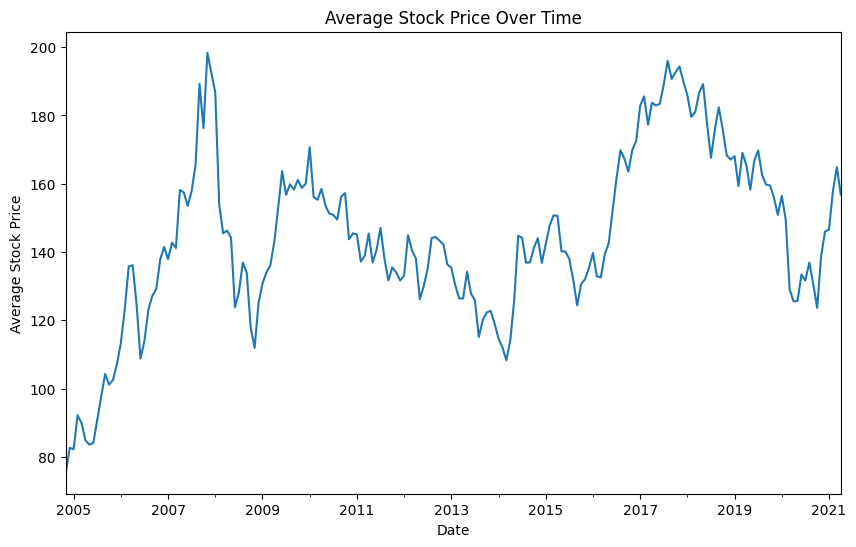

In [10]:
# Plotting average stock price over time
plt.figure(figsize=(10, 6))
sector_data['Date'] = pd.to_datetime(sector_data['Date'])
sector_data.set_index('Date', inplace=True)
sector_data['Close'].resample('M').mean().plot()
plt.title('Average Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average Stock Price')
plt.show()

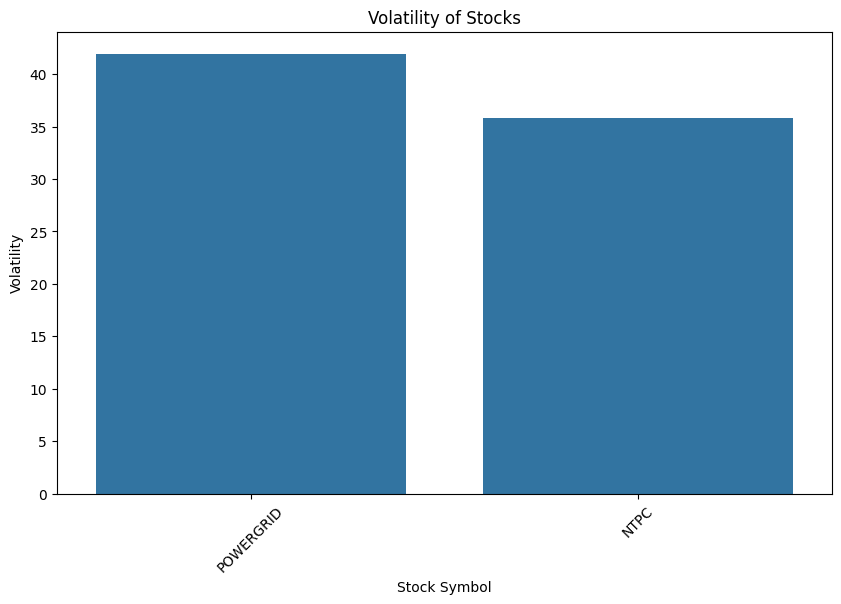

In [11]:
# Calculate volatility of stocks
volatility = sector_data.groupby('Symbol')['Close'].std().sort_values(ascending=False)

# Plotting volatility of stocks
plt.figure(figsize=(10, 6))
sns.barplot(x=volatility.index, y=volatility.values)
plt.title('Volatility of Stocks')
plt.xlabel('Stock Symbol')
plt.ylabel('Volatility')
plt.xticks(rotation=45)
plt.show()

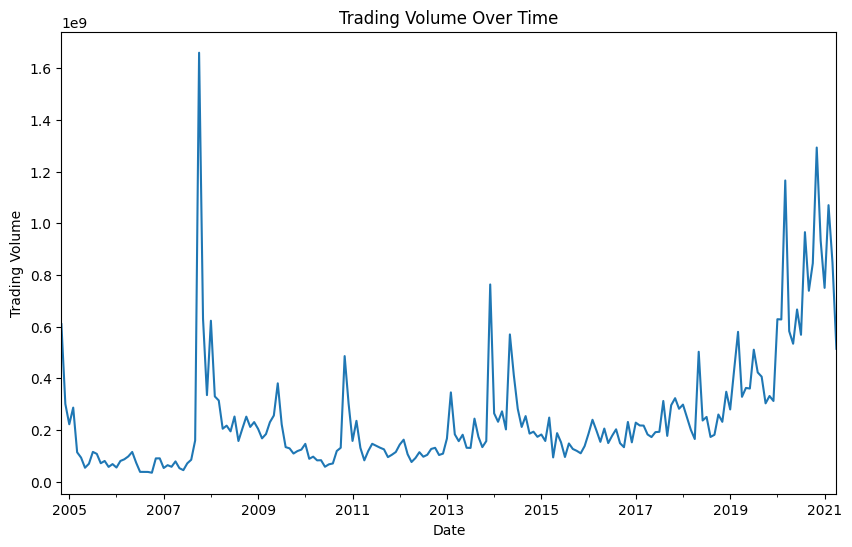

In [12]:
# Plotting trading volume over time
plt.figure(figsize=(10, 6))
sector_data['Volume'].resample('M').sum().plot()
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.show()


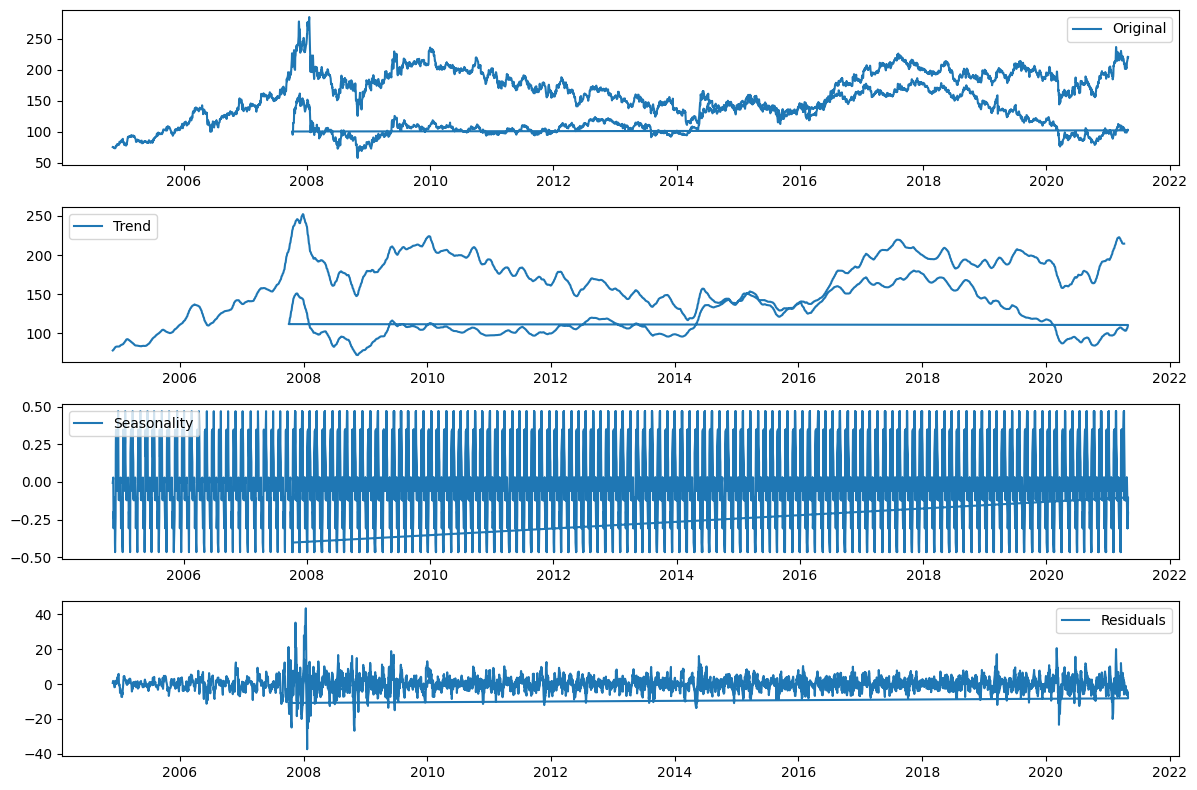

In [13]:
# Seasonal decomposition of stock prices
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(sector_data['Close'], model='additive', period=30)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(sector_data['Close'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

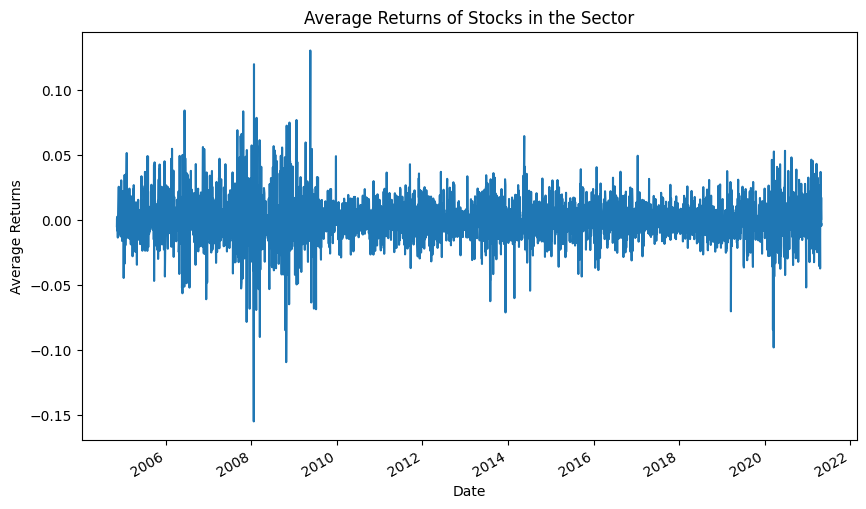

In [14]:
# Calculate daily returns for each stock
sector_data['Return'] = sector_data.groupby('Symbol')['Close'].pct_change()

# Calculate average returns for all stocks in the sector
average_returns = sector_data.groupby('Date')['Return'].mean()

# Plotting average returns over time
plt.figure(figsize=(10, 6))
average_returns.plot()
plt.title('Average Returns of Stocks in the Sector')
plt.xlabel('Date')
plt.ylabel('Average Returns')
plt.show()